# Polynomial regression learning

In [1]:
import numpy as np

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

Text(0.5, 0, 'Y values')

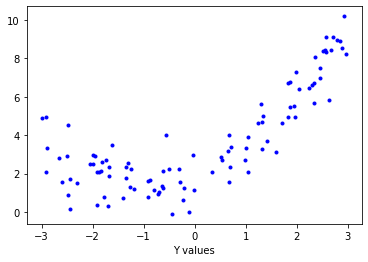

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, y, "b.")
plt.xlabel("X values")
plt.xlabel("Y values")

As we can see, this data is not fittable with linear model, so, at first, we'll need to transform the training data via adding square (hence polynomial) of each feature to it.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
x_poly = poly_features.fit_transform(x)

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [5]:
lin_reg.intercept_, lin_reg.coef_

(array([1.91597706]), array([[0.99113283, 0.51562356]]))

## Builing learning curves

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")

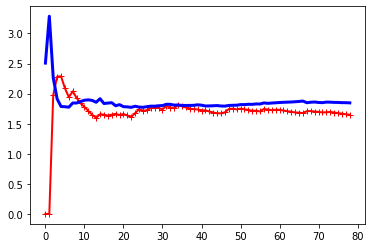

In [8]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

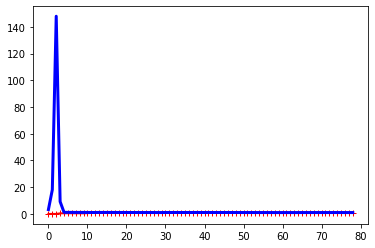

In [9]:
plot_learning_curves(lin_reg, x_poly, y)

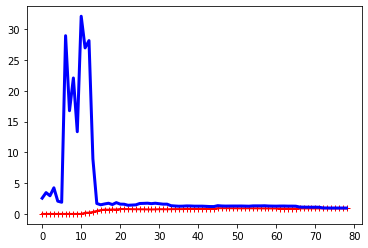

In [10]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)